In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [3]:
A = np.zeros((6, 3), dtype=int)
A[::2, ::2] = 1
A[1::2, 1::2] = 1

B = np.arange(1, 25).reshape((6, 4))
B[1::2] = B[1::2, ::-1]

np.random.seed(0)
C = np.random.randint(2, 11, size=(4, 3))


D = np.identity(4, dtype=int)

top = np.hstack((A, B))
bottom = np.hstack((C, D))
S = np.vstack((top, bottom))

F = np.zeros((10, 2), dtype=int)
G = np.hstack((S, F))
print(G)

[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 7  2  5  1  0  0  0  0  0]
 [ 5  9  5  0  1  0  0  0  0]
 [ 7  4  6  0  0  1  0  0  0]
 [ 9  8 10  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [4]:
def find_nearest_neighbour(X, a):
    diff = np.abs(X-a)
    id = np.argmin(diff)
    return X.flat[id]



In [5]:
X = np.arange(0,10).reshape(2,5)
a = 3.6
c = find_nearest_neighbour(X, a);
print(c)

4


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [6]:
# Придумайте свои данные для примера, N >= 4
A = np.arange(1, 37).reshape(6, 6)
b = np.arange(1, 7)
X = np.arange(10, 16)

def very_strange_neural_network(A, b, X):
    sq = np.matmul(A, A)
    transform = np.matmul(sq, X)
    second_transform = np.matmul(transform, b)
    return second_transform


print(very_strange_neural_network(A, b, X))

4325580


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [7]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.sum(np.abs(M[M<0]))

def find_max_height(M):
    return np.max(M)

In [8]:
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [9]:
def count_all_islands(a):
    tmp = np.diff(a) == 1
    return np.sum(tmp) + (a[0] == 1)

In [10]:
a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [11]:
def swap_mask_for_average(X, a):
    mn = X.mean()
    flag = X > a
    X[flag] = mn
    return X

In [12]:
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [13]:
def count_trace_diff(M):
    return np.trace(M) - np.trace(np.fliplr(M))

In [14]:
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [15]:
def create_mountain(a):
    tmp = np.concatenate([a, a[::-1]])
    print(tmp)
    return tmp[:, np.newaxis] + tmp

In [16]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

[0 1 2 3 4 4 3 2 1 0]


array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [17]:
def custom_blur(P, C):
    windows = np.lib.stride_tricks.sliding_window_view(P, (C, C))
    result = windows.mean(axis=(2, 3))
    return result

In [18]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [19]:
def check_successful_broadcast(*matrices):
    shapes = [np.array(shape) for shape in matrices]
    max_len = max(len(shape) for shape in shapes)
    align_shapes = [np.pad(shape, (max_len - len(shape), 0), constant_values=1) for shape in shapes]
    try:
        result_shape = np.maximum.reduce(align_shapes)
        return True
    except ValueError:
        return False

In [20]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [21]:
def pairwise_distances(A, B):
    return ((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2) ** 0.5

In [22]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8], [9, 10]])

pairwise_distances(A, B)

array([[ 8.48528137, 11.3137085 ],
       [ 5.65685425,  8.48528137],
       [ 2.82842712,  5.65685425]])

Объясни принцип работы этой одной строчки. Что именно происходит в ней?
<font color='red'> Сначала для того чтобы была возможность использования броадкастинга каждая матрица(массив) размерности m x n, и n x k "расширяется" до 3х мерной матрицы размерности (m x 1 x n), и (1 x n x k) соответственно. Далее вычитаем из матрицы A размерности (m x 1 x n), матрицу B размерности (1 x n x k). Происходит броадкастинг, т.е каждая из матриц теперь имеет размерности (m x n x k). Получили матрицу размерности (m x n x k) которая теперь содердит разности A[i] - B[j] на [i, j, :] позициях. Далее вычисляем расстояния и суммируем по k и берем квадратный корень. На выходе получаем матрицу расстоаяний размерности (m x n). </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [47]:
data = pd.read_csv("data_numpy_lab.csv")
data.head()
data = pd.DataFrame(data)
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [48]:
data['mass, gramm'] = data['mass, gramm'] / 1000.0
data['length, cm'] = data['length, cm'] / 100.0
data.rename(columns={
    'N': 'revolutions',
    't, sec': 'time',
    'sigma_t, sec': 'error',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'angle'
}, inplace=True)

data.columns = [column.replace(' ', '') for column in data.columns]

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)
data.head()

,Unnamed:0,revolutions,time,error,mass,length,angle
0,1,4,268,1,0.18,1.21,0.16
1,2,4,264,1,0.18,1.21,0.18
2,3,4,275,1,0.18,1.21,0.16
3,4,4,263,1,0.18,1.21,0.17
4,5,4,267,1,0.18,1.21,0.17


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [49]:
data['omega'] = 2 * np.pi * data['revolutions'] / data['time']
data['sigma_omega'] = data['omega'] / data['time'] * data['error']
data['omega_down'] = data['angle'] / data['time']
data['sigma_down'] = data['omega_down'] * data['error'] / data['time']
data['momentum'] = data['mass'] * 9.8 * data['length']
data['momentum_down'] = data['mass'] * data['angle']  * (data['length'] ** 2) / (data['time'] ** 2)
data['sigma_momentum'] = data['momentum_down'] * 2 * data['error'] / data['time']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()

,Unnamed:0,revolutions,time,error,mass,length,angle,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,5.870751e-07,4.381157e-09
1,2,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,6.806250e-07,5.156250e-09
2,3,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,5.575680e-07,4.055040e-09
3,4,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,6.477101e-07,4.925552e-09
4,5,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,6.284484e-07,4.707479e-09


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [54]:
grouped_data = data.groupby('mass').mean()
assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

,Unnamed:0,revolutions,time,error,length,angle,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
mass,,,,,,,,,,,,,
0.142,18.0,3.0,282.8,1.0,1.21,0.158,0.066661,0.000236,0.000559,0.000002,1.683836,4.108862e-07,2.906917e-09
0.180,3.0,4.0,267.4,1.0,1.21,0.168,0.094012,0.000352,0.000629,0.000002,2.134440,6.202853e-07,4.645096e-09
0.216,8.0,3.0,230.8,1.0,1.08,0.164,0.081687,0.000354,0.000710,0.000003,2.286144,7.755223e-07,6.721701e-09
0.273,23.0,4.0,175.4,1.0,1.22,0.164,0.143300,0.000817,0.000935,0.000005,3.263988,2.166527e-06,2.470970e-08
0.341,28.0,5.0,208.4,1.0,1.10,0.166,0.150752,0.000723,0.000797,0.000004,3.675980,1.577406e-06,1.514038e-08
0.614,13.0,6.0,203.6,1.0,1.11,0.166,0.185194,0.000910,0.000815,0.000004,6.679092,3.030996e-06,2.978946e-08


## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

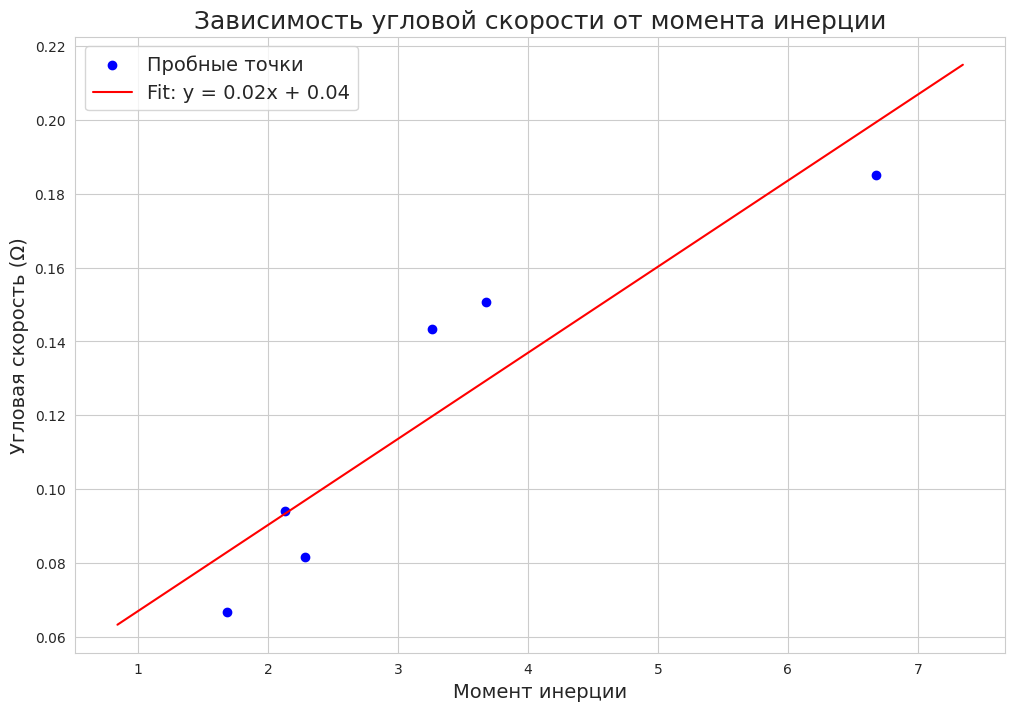

In [55]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Воспользуйтесь np.polyfit
# coefs = ...
coefs = np.polyfit(momentum_np, omega_np, 1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Примените np.polyval к коэффициентам и x_lsq
# y_lsq = ...
y_lsq = np.polyval(coefs, x_lsq)
fig = plt.figure(figsize=(12, 8))


plt.scatter(momentum_np, omega_np, color='blue', label='Пробные точки')
plt.plot(x_lsq, y_lsq, color='red', label=f'Fit: y = {coefs[0]:.2f}x + {coefs[1]:.2f}')

# Настройка графика
plt.title('Зависимость угловой скорости от момента инерции', fontsize=18)
plt.xlabel('Момент инерции', fontsize=14)
plt.ylabel('Угловая скорость (Ω)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
# YOUR CODE HERE
# ...
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [56]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

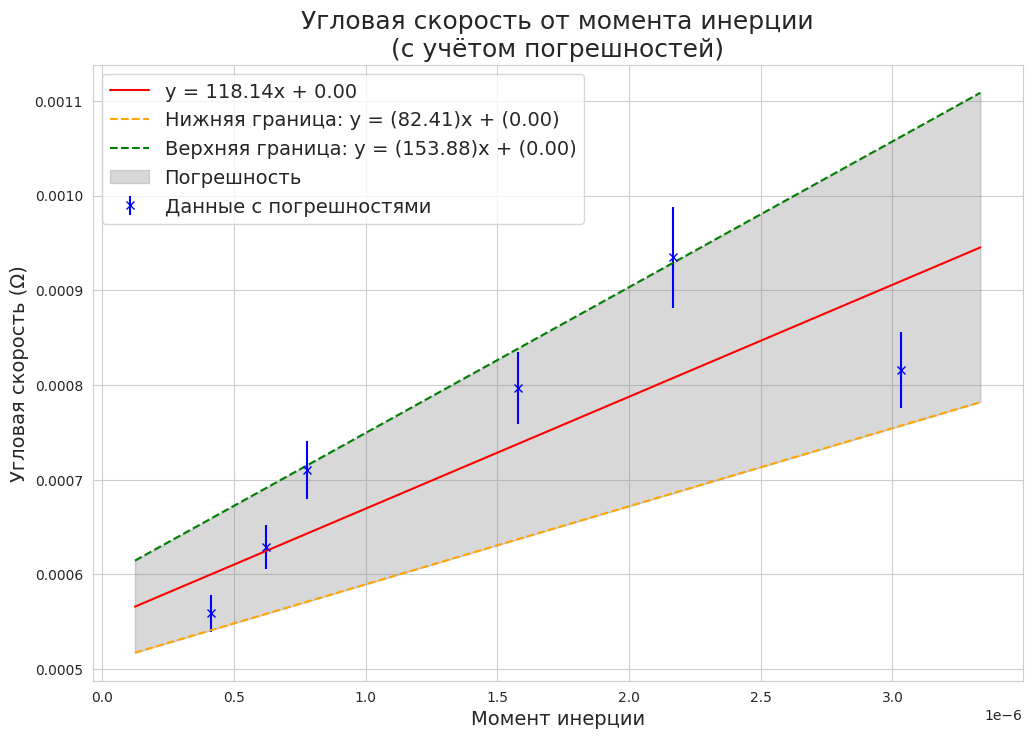

In [57]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)
sigma_down = np.array(grouped_data.sigma_down)
# Снова polyfit, но с дополнительным параметром и возвращающий ковариацию!
coefs, cov = np.polyfit(momentum_down_np, omega_down_np, 1, w=1 / sigma_down, cov=True)


# Чтобы прямая построилась снова красиво
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

# Посчитайте корень диагональных элементов, должен получиться массив размером (2,)
lsq_stds = np.sqrt(np.diag(cov))

k, b = coefs
sigma_k, sigma_b = lsq_stds

# Знакомый polyfit, но три раза
y_lsq = k * x_lsq + b
y_lsq_lower = (k - sigma_k) * x_lsq + (b - sigma_b)
y_lsq_upper = (k + sigma_k) * x_lsq + (b + sigma_b)
fig = plt.figure(figsize=(12, 8))


plt.errorbar(momentum_down_np, omega_down_np, yerr=sigma_down, fmt='x', color='blue', label='Данные с погрешностями')
plt.plot(x_lsq, y_lsq, color='red', label=f'y = {k:.2f}x + {b:.2f}')

plt.plot(x_lsq, y_lsq_lower, '--', color='orange', label=f'Нижняя граница: y = ({k - sigma_k:.2f})x + ({b - sigma_b:.2f})')
plt.plot(x_lsq, y_lsq_upper, '--', color='green', label=f'Верхняя граница: y = ({k + sigma_k:.2f})x + ({b + sigma_b:.2f})')
plt.fill_between(x_lsq, y_lsq_lower, y_lsq_upper, color='gray', alpha=0.3, label='Погрешность')


plt.title('Угловая скорость от момента инерции\n(с учётом погрешностей)', fontsize=18)
plt.xlabel('Момент инерции', fontsize=14)
plt.ylabel('Угловая скорость (Ω)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [58]:
sns.set_style("darkgrid")

In [59]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

iris = iris.drop(columns='Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [61]:
iris.value_counts('Species')

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

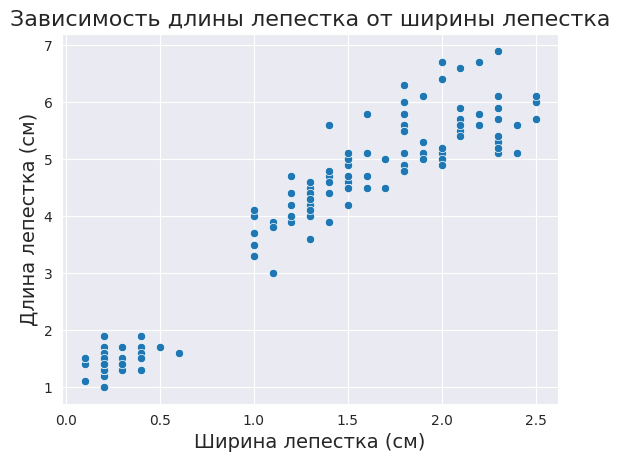

In [62]:
# TODO
sns.scatterplot(data=iris, x="PetalWidthCm", y="PetalLengthCm")
plt.xlabel("Ширина лепестка (см)", fontsize=14)
plt.ylabel("Длина лепестка (см)", fontsize=14)
plt.title("Зависимость длины лепестка от ширины лепестка", fontsize=16)
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>Вывод из графика следующий:что чем больше ширина лепестка тем больше длина лепестка. Но графику не хватает информации о том, что какой вид цветка используется, так как тут отображена некая зависимость в целом которая сущна всем ирисам. </font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

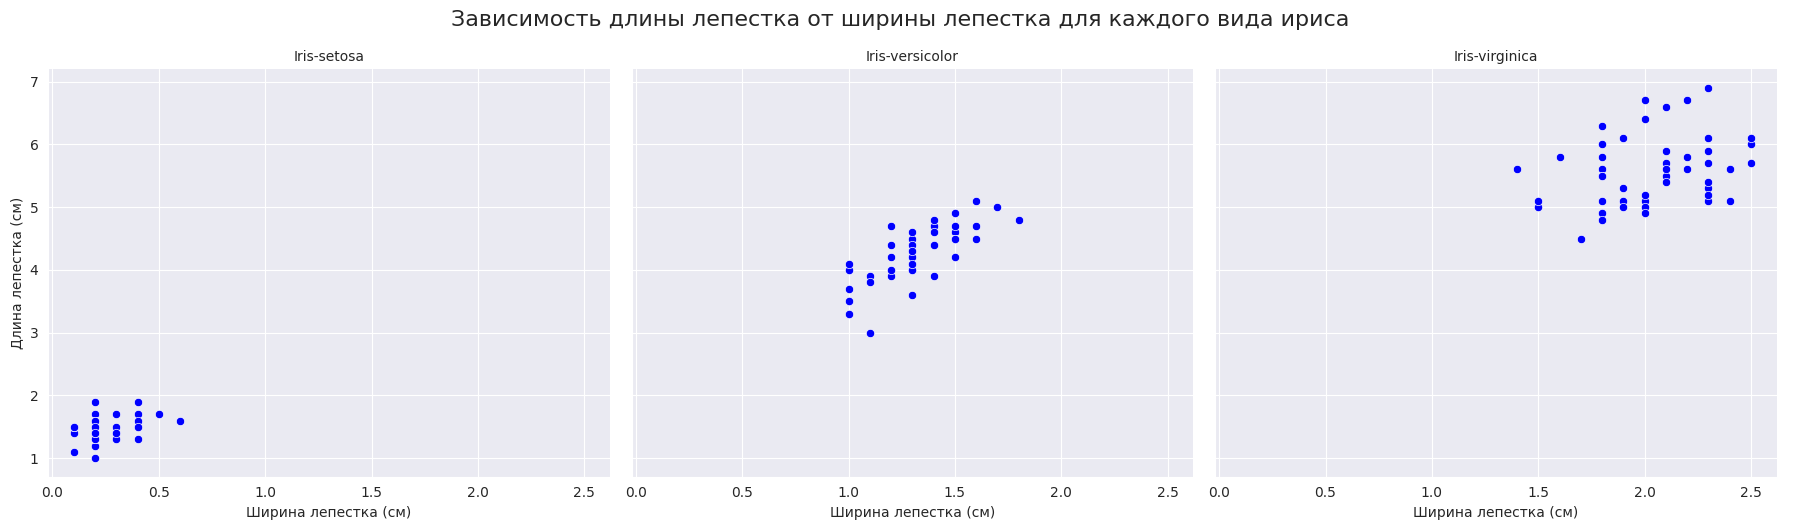

In [65]:
#TODO
gr = sns.FacetGrid(iris, col="Species", height=5, aspect=1.2, sharex=True, sharey=True)
gr.map(sns.scatterplot, "PetalWidthCm", "PetalLengthCm", color="blue")
gr.set_axis_labels("Ширина лепестка (см)", "Длина лепестка (см)")
gr.set_titles("{col_name}")
gr.fig.suptitle("Зависимость длины лепестка от ширины лепестка для каждого вида ириса", fontsize=16, y=1.05)
gr.add_legend()
plt.show()

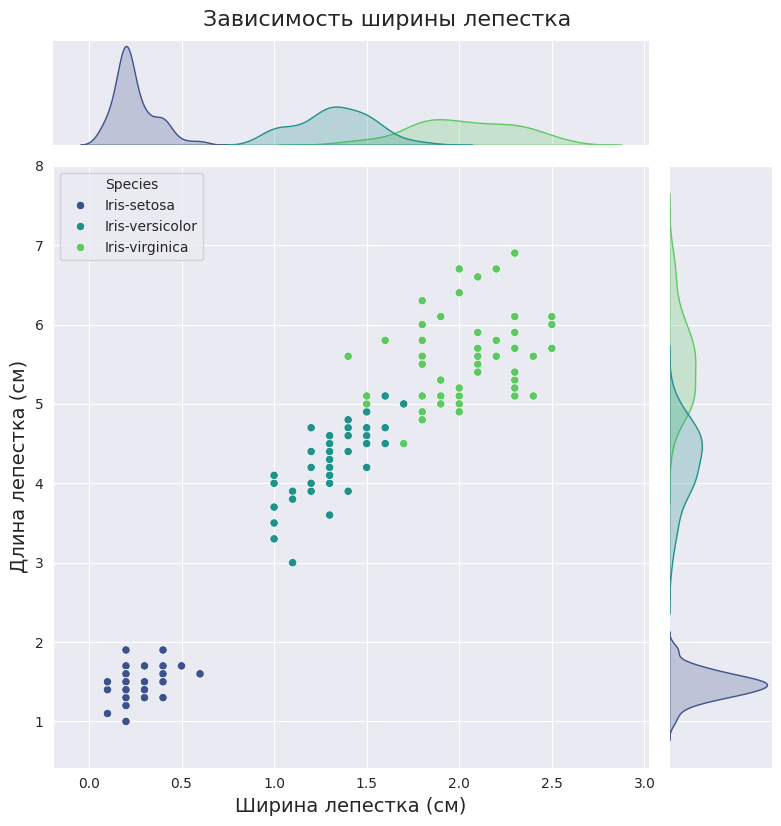

In [64]:
sns.jointplot(
    data=iris,
    x="PetalWidthCm",
    y="PetalLengthCm",
    hue="Species",
    palette="viridis",
    kind="scatter",
    height=8
)

plt.suptitle("Зависимость ширины лепестка", fontsize=16, y=1.02)
plt.xlabel("Ширина лепестка (см)", fontsize=14)
plt.ylabel("Длина лепестка (см)", fontsize=14)
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> Выводы из графиков можно сделать следующие.
(1) Все три вида ириса имеют длиные и не очень широкие лепестки. Также наблюдается рост длины лепестка в зависимости от роста ширины лепестка у всех трех видов ириса. Самый тонкие по ширине лепестки у вида Iris-Setosa, самые широкик лепестки у Iris-Virginica. По сути, jointplot и facetgrid выражают примерно одну и ту же информацию, так как jointplot выразил зависимость для трех видова ириса в одном графике, в то время как facetgrid выразил фактически ту же самую информацию, но сделал это по отдельности для каждого вида ириса. Scatterplot видимо лучше же использовать для обобщения, например с самого первого графика зависимости которые был sns.scatterplot мы просто извлекли информацию о том чем больше ширина лепестка тем больше его длина, но про вид ириса конкретно мы ничего не узнали. </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

<ipython-input-66-5e43dd5f80b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x="Species", y="PetalLengthCm", palette="pastel")


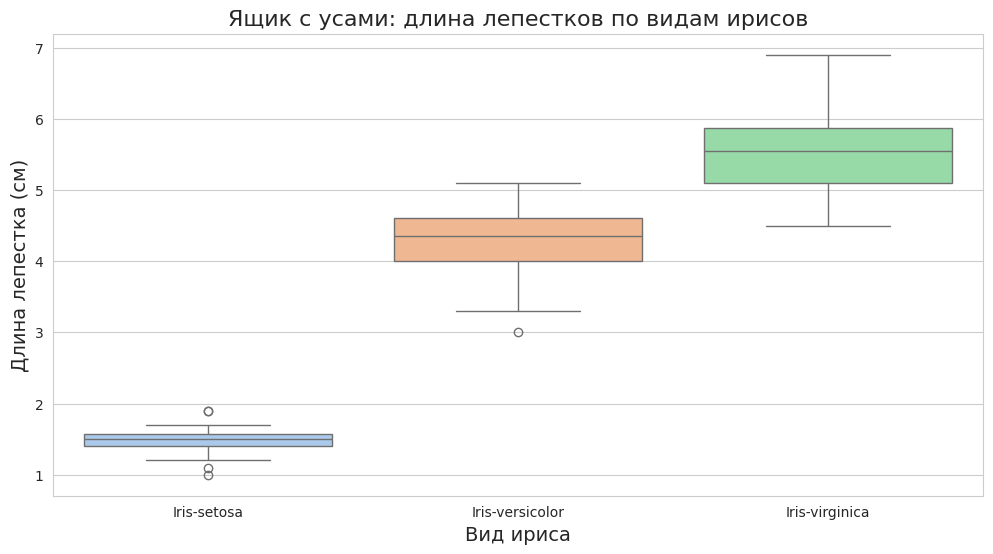

In [66]:
# График boxplot
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x="Species", y="PetalLengthCm", palette="pastel")
plt.title("Ящик с усами: длина лепестков по видам ирисов", fontsize=16)
plt.xlabel("Вид ириса", fontsize=14)
plt.ylabel("Длина лепестка (см)", fontsize=14)
plt.show()

<ipython-input-70-d5cdb3f8408f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=iris, x="Species", y="PetalLengthCm", palette="muted")


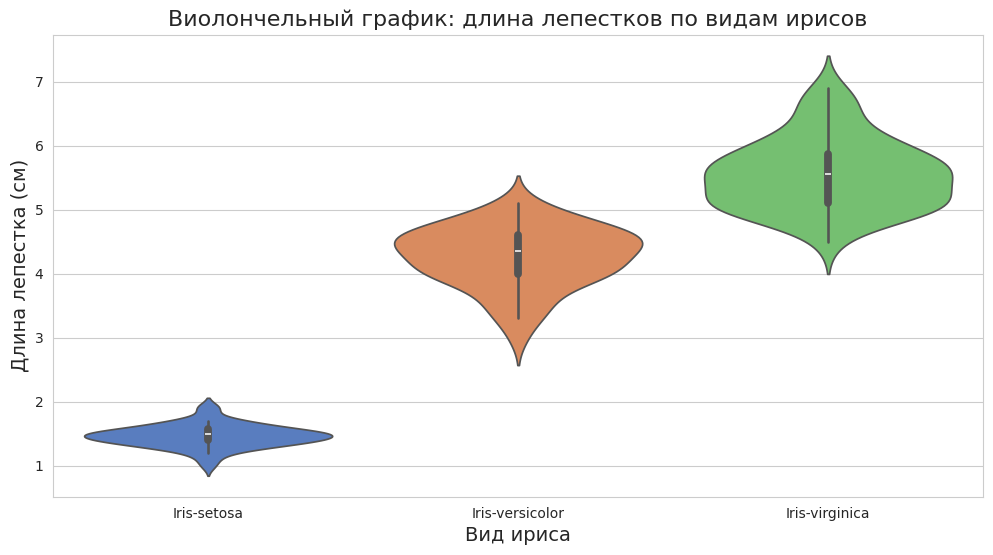

In [70]:
# График violinplot
plt.figure(figsize=(12, 6))
sns.violinplot(data=iris, x="Species", y="PetalLengthCm", palette="muted")
plt.title("Виолончельный график: длина лепестков по видам ирисов", fontsize=16)
plt.xlabel("Вид ириса", fontsize=14)
plt.ylabel("Длина лепестка (см)", fontsize=14)
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> Для нашей задачи кажется подходит лучше boxplot, так как описывает распределение с помощью медианы, в то время как violinplot описывает еще и плотность распределения. Информацию мы получили следующую: Iris-setosa лепестки самые короткие с более узким распределением (все значения близки к медиане). Iris-virginica лепестки самые длинные, с большими выбросами, также его распределение имеет более вытянутый "хвост", что означает большое количество длинных лепестков. Iris-versicolor распределение данных ближе к симметричному, но есть некоторые выбросы, которые не видны на графике плотности. </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

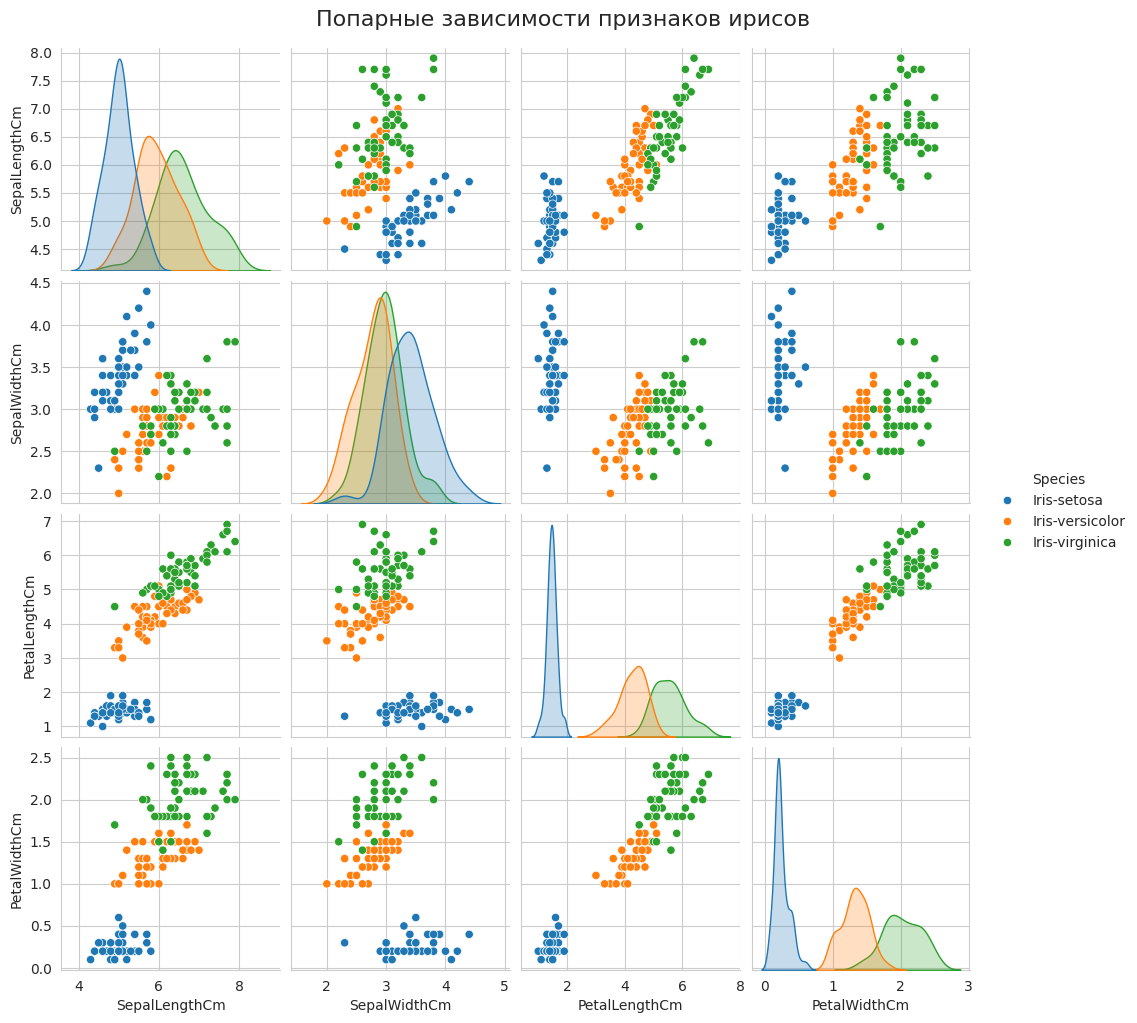

In [71]:
sns.pairplot(
    iris,
    hue='Species'
)

plt.suptitle("Попарные зависимости признаков ирисов", fontsize=16, y=1.02)

plt.show()

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> Можно увидеть корреляцию между длиной чашелистика и шириной лепестка, это явно видно на нижнем левом графике. У Iris-setosa, несмотря на то что длина чашелистика начинается от 4 заканчивается на 6см, ее ширина ее лепестка достигает максимально 0.5см, у Iris-versicolor ширина лепестка начаинается c 1.0см и достигагает максмимально в некоторых случаях 1.7см. Большинство растений Iris-virginica имеют длину чашелистика такую-же как и у половины Iris-versicolor, от 5 до 7см. Но некоторые представители достигают 8см. Также можно увидеть отношение между длиной и шириной чашелистика. Iris-setosa имеет в длину чашелистика такую же как и большинство представителей Iris-versicolor. Однако с ростом длины чашелистика растет и его ширина у представителей Iris-setosa, что и наблюдается у представителей других видов ириса, но Iris-setosa имеет ширину чашелистика существенно больше чем у остальных видов.  </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> На диагоналях находятся графики плотностей распределения видов ириса. Они используются чтобы визуализировать распределения относительно тех или иных </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

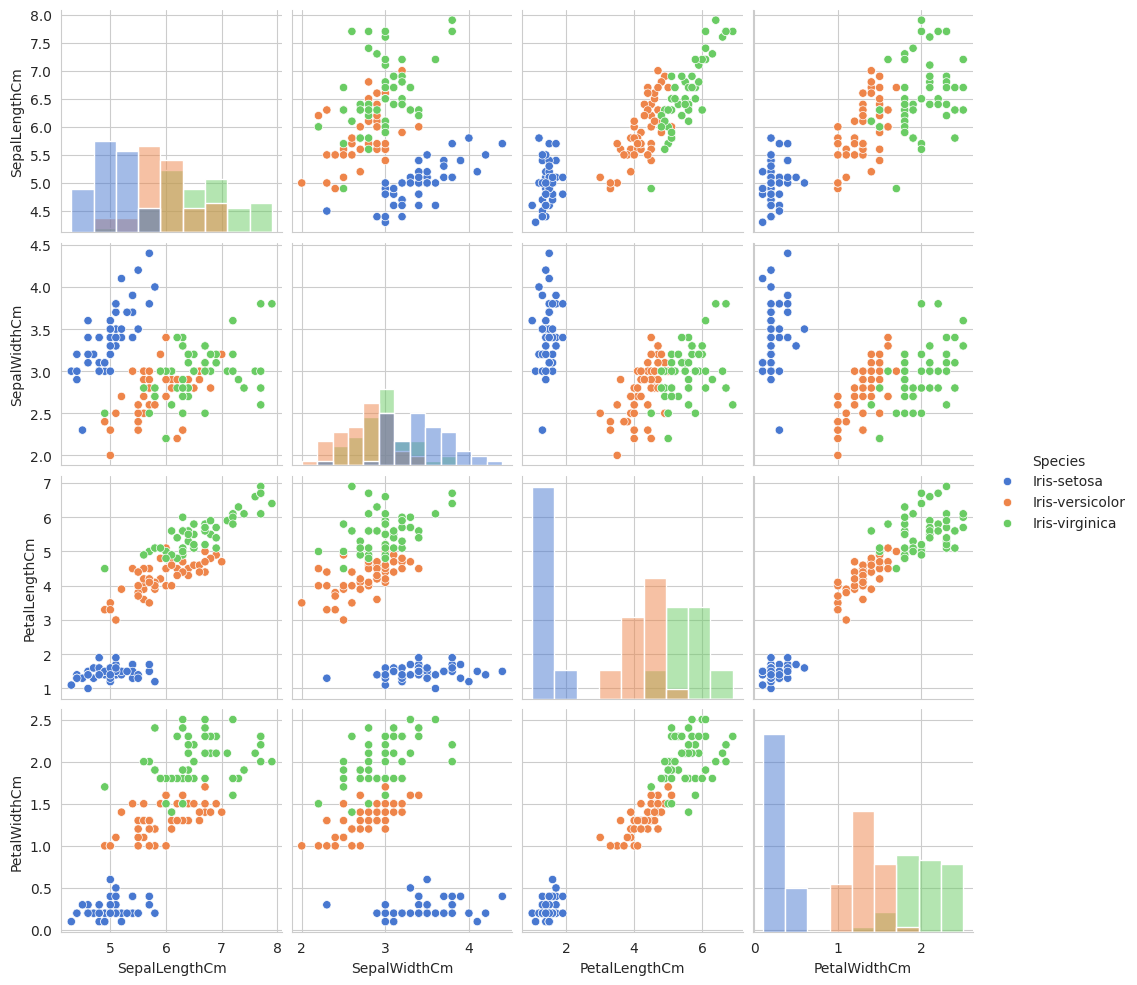

In [72]:
sns.pairplot(
    iris,
    hue="Species",
    diag_kind="hist",
    palette="muted",
)

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> На диагоналях теперь находятся гистограммы. Визуально конечно графики на диагонялях более легче анализируются чем графики плотности. </font>